In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import sys
sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../data'))
import data_preparation_sm as sm
import modeling as m
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('../data/transformed_data1.csv')

C:\Users\Hp\AppData\Local\Temp\ipykernel_13620\3167079008.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/transformed_data1.csv')


In [3]:
# Select a subset of the data for quicker processing
df = df.sample(n=200000, random_state=42) 

In [4]:
# prepare data
df = sm.feature_engineering(df)

c:\Users\Hp\Desktop\Kifiya\Week3\ACIS-Claim-Analytics\scripts\data_preparation_sm.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce')


In [5]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,TotalClaims,Year,Month,AgeOfVehicle,VehicleValue,DriverExperience,Region_VehicleType,VehicleMake_CoverType,CoverGroup_Premium,CoverGroup_Claims
251986,168327,14084,2015-04-01,False,ZA,Individual,Mr,English,Capitec Bank,Savings account,...,0.0,2015,4,13,0,14,KwaZulu-Natal_Passenger Vehicle,TOYOTA_Own Damage,Comprehensive - Taxi_0.0,Comprehensive - Taxi_0.0
158758,142917,12434,2015-08-01,False,ZA,Individual,Mr,English,ABSA Bank,Savings account,...,0.0,2015,8,11,0,9,Gauteng_Passenger Vehicle,TOYOTA_Signage and Vehicle Wraps,Comprehensive - Taxi_2.320438596491,Comprehensive - Taxi_0.0
219262,110219,7699,2015-02-01,False,ZA,Individual,Mr,English,Capitec Bank,Savings account,...,0.0,2015,2,16,0,15,North West_Passenger Vehicle,TOYOTA_Passenger Liability,Comprehensive - Taxi_1.083421052631,Comprehensive - Taxi_0.0
561053,49344,4082,2015-03-01,False,ZA,Individual,Mr,English,First National Bank,Current account,...,0.0,2015,3,16,1,15,Gauteng_Passenger Vehicle,TOYOTA_Cleaning and Removal of Accident Debris,Comprehensive - Taxi_5.994385964912,Comprehensive - Taxi_0.0
403321,108618,8322,2015-01-01,False,ZA,Individual,Mr,English,Nedbank,Current account,...,0.0,2015,1,16,0,15,Gauteng_Passenger Vehicle,TOYOTA_Windscreen,Comprehensive - Taxi_0.0,Comprehensive - Taxi_0.0


In [6]:
df = sm.encode_categorical_data(df)

In [7]:
df = sm.scale_numerical_features(df)

In [8]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice',
       'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt',
       'Converted', 'CrossBorder', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'Year', 'Month',
       'AgeOfVehicle', 'VehicleValue', 'DriverExperience',
       'Region_VehicleType', 'VehicleMake_CoverType', 'CoverGroup_Premium',
       'Co

In [9]:
# Split data into training and testing sets
target_columns = ['TotalPremium', 'TotalClaims']
X_train, X_test, y_train, y_test = train_test_split(df.drop(target_columns, axis=1), 
                                                    df[target_columns], test_size=0.3, random_state=42)

In [10]:
# Feature selection
X_train_selected = m.feature_selection_dask(X_train, y_train)

In [11]:
# Handle imbalanced data
model = m.handle_imbalanced_data_regression(X_train_selected, y_train['TotalPremium'])

In [12]:
# Upsample the training data
X_train_upsampled = X_train_selected  
y_train_upsampled = y_train 

In [13]:
# Select only the features that are present in the training set
X_test_selected = X_test[X_train_upsampled.columns]

In [14]:
# Train and evaluate models
m.train_and_evaluate_models(X_train_upsampled, X_test_selected, y_train_upsampled, y_test, ['TotalPremium'])

RandomForestRegressor - MSLE: 0.018355986256657453
XGBRegressor - MSLE: 0.04968440232710292
LinearRegression - MSLE: 0.9813424323492921
Best Model: RandomForestRegressor - MSLE: 0.018355986256657453
Test MSLE: 0.015940700579174478


c:\Users\Hp\PycharmProjects\HelloWorld\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Hp\Desktop\Kifiya\Week3\ACIS-Claim-Analytics\scripts\modeling.py:42: RuntimeWarning: invalid value encountered in log
  return np.mean((np.log(y_true + 1e-6) - np.log(y_pred + 1e-6)) ** 2)


100%|===================| 59994/60000 [21:50<00:00]        

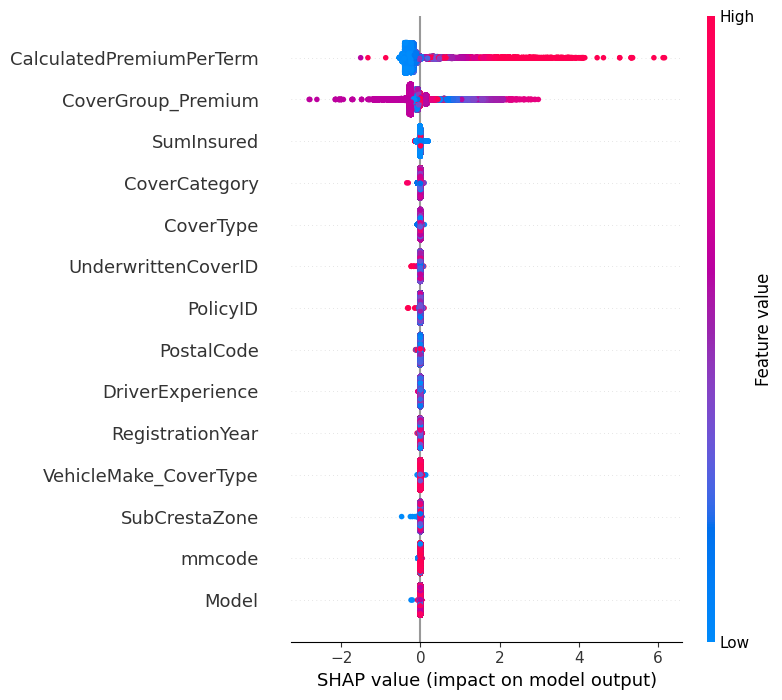

In [15]:
# Interpret model
best_model = RandomForestRegressor()
best_model.fit(X_train_upsampled, y_train_upsampled['TotalPremium'])
m.interpret_model(best_model, X_test_selected)